<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Mia-branch/HeartAttack_MachineLearning_2_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

<div>
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information.

2. Sex: Indicates someone's gender.

3. GeneralHealth: Describes someone's overall health condition.

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition.

6. LastCheckupTime: Contains the information of the last health check

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health.

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not.

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not.

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not.

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not.

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not.

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not.

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not.

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not.

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity.

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual.

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not.

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not.

39. HighRiskLastYear: Stores information about whether someone was in high risk or not.

40. CovidPos: Stores information about whether someone had Covid or not.

# 1. Loading the Dataset from CSV

In [ ]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

In [ ]:
for col in df.columns:
  print(col)

# 2. Exploring the Dataset

In [ ]:
# Check he missing data
%matplotlib inline
msno.matrix(df)

In [ ]:
df.info()

In [ ]:
# Statistical Analysis for numerical data in dataset
print(f"Summary of the Dataset with Numerical Columns")
df.describe()

In [ ]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

In [ ]:
# How many distinct values in each column
for column in df.columns:
    print(f"{column}: {len(df[column].unique())} distinct values")

In [ ]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

In [ ]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD',
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating',
    'DifficultyDressingBathing', 'DifficultyErrands',
    'HeightInMeters', 'WeightInKilograms',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df1 = df.drop(columns=columns_to_drop)
df1

In [ ]:
# Check columns names after dropping
df1.columns

In [ ]:
# Reorganize columns order
column_order = [
        # User Info
        'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory','BMI',
        # General health
        'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'ChestScan',
        # risks
        'SleepHours', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers',
        # Medication History
        'HadHeartAttack', 'HadAngina',  'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease','HadDiabetes',
        ]
df1 = df1[column_order]
df1

In [ ]:
# Renaming columns using a dictionary
df1 = df1.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df1

In [ ]:
# Plot the distribution of NaN Values
df1.isna().sum().sort_values().plot(kind="barh")
plt.show()

In [ ]:
# Remove the missing values
df1 = df1.dropna()

# Check again the missing values
df1.isna().sum()

<Axes: >

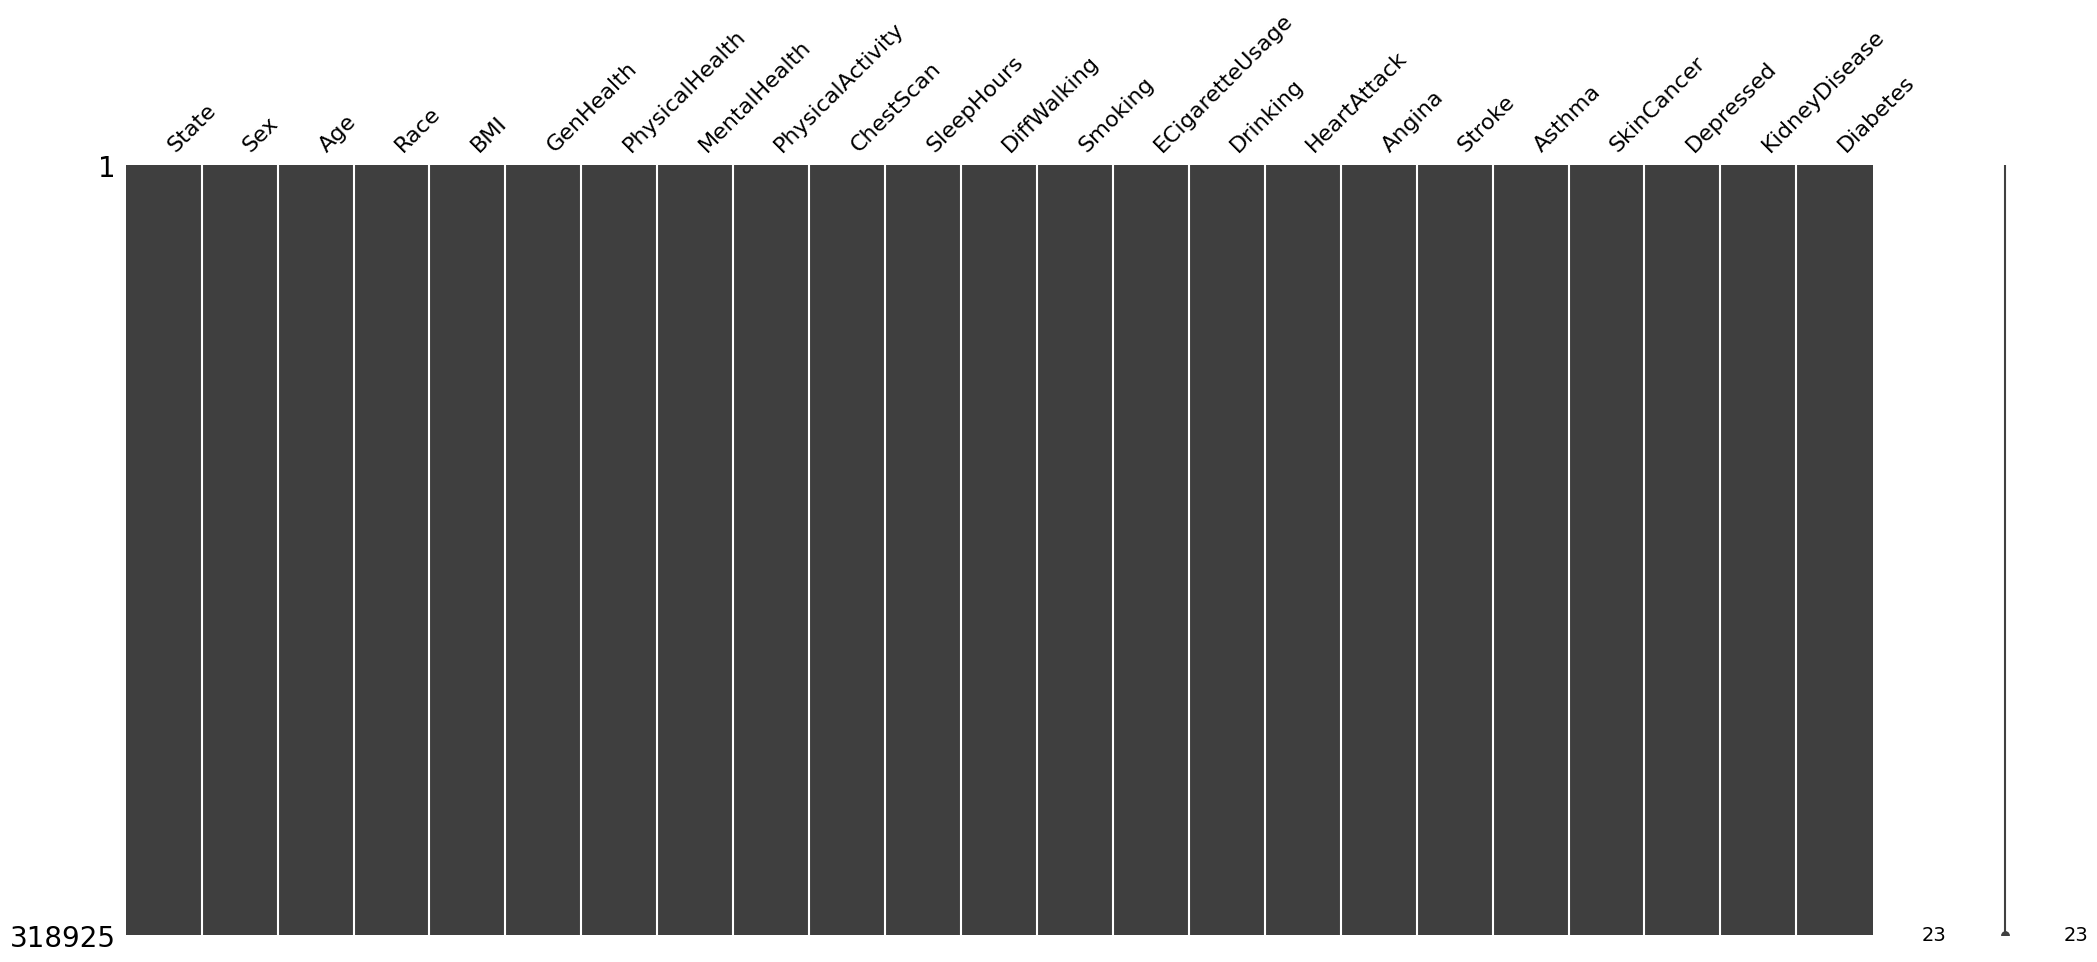

In [ ]:
# Check he missing data
msno.matrix(df1)

In [ ]:

# Statistical Analysis for numerical data in dataset
df1.describe()

,BMI,PhysicalHealth,MentalHealth,SleepHours
count,318925.000000,318925.000000,318925.000000,318925.000000
mean,28.569902,4.147646,4.317178,7.022109
std,6.515587,8.433619,8.227483,1.443658
min,12.020000,0.000000,0.000000,1.000000
25%,24.190000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.750000,3.000000,5.000000,8.000000
max,97.650000,30.000000,30.000000,24.000000


In [ ]:
df1.dtypes

State                object
Sex                  object
Age                  object
Race                 object
BMI                 float64
GenHealth            object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
ChestScan            object
SleepHours          float64
DiffWalking          object
Smoking              object
ECigaretteUsage      object
Drinking             object
HeartAttack          object
Angina               object
Stroke               object
Asthma               object
SkinCancer           object
Depressed            object
KidneyDisease        object
Diabetes             object
dtype: object

In [ ]:
df1.describe(include="object")

,State,Sex,Age,Race,GenHealth,PhysicalActivity,ChestScan,DiffWalking,Smoking,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
count,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925
unique,54,2,13,5,5,2,2,2,4,4,2,2,2,2,2,2,2,2,4
top,Washington,Female,Age 65 to 69,"White only, Non-Hispanic",Very good,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
freq,19036,163410,34885,241132,112204,247712,185307,272507,192467,243692,176142,301979,300008,306075,271260,292637,252214,304756,266735


In [ ]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df1.describe(include="object").columns:
    print(f"Column Name: {col} with {len(df1[col].unique())} distinct values")
    print(df1[col].unique())
    print("____________________________________")

Column Name: State with 54 distinct values
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
____________________________________
Column Name: Sex with 2 distinct values
['Female' 'Male']
____________________________________
Column Name: Age with 13 distinct values
['Age 80 or older' 'Age 55 to 59' 'Age 40 to 44' 'Age 65 to 69'
 'Age 70 to 74' 'Age 60 to 64' 'Age 75 to 79' 'Age 50 to 54'
 'Age 45 to 49'

In [ ]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## Since, some categorical attributes are overlapping --> Cleaning Needed

In [ ]:
# Check the "Race" category
unique_race = df1["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         241132
Hispanic                          29942
Black only, Non-Hispanic          24334
Other race only, Non-Hispanic     16251
Multiracial, Non-Hispanic          7266
Name: count, dtype: int64


In [ ]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df1["Race"] = df1["Race"].replace(rename_race)
print(df1["Race"].value_counts())

Race
White          241132
Hispanic        29942
Black           24334
Other           16251
Multiracial      7266
Name: count, dtype: int64


In [ ]:
# Check the "Age" category
print(df1["Age"].value_counts())

Age
Age 65 to 69       34885
Age 60 to 64       32885
Age 70 to 74       31746
Age 55 to 59       27413
Age 50 to 54       25025
Age 80 or older    23448
Age 75 to 79       23051
Age 40 to 44       22339
Age 45 to 49       21293
Age 35 to 39       21157
Age 18 to 24       20312
Age 30 to 34       18892
Age 25 to 29       16479
Name: count, dtype: int64


In [ ]:
df1["Age"] = (df1["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df1["Age"].value_counts())

Age
65-69          34885
60-64          32885
70-74          31746
55-59          27413
50-54          25025
80 or older    23448
75-79          23051
40-44          22339
45-49          21293
35-39          21157
18-24          20312
30-34          18892
25-29          16479
Name: count, dtype: int64


In [ ]:
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                                         266735
Yes                                         42432
No, pre-diabetes or borderline diabetes      7109
Yes, but only during pregnancy (female)      2649
Name: count, dtype: int64


In [ ]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df1["Diabetes"] = df1["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                         266735
Yes                         42432
No, borderline diabetes      7109
Yes, during pregnancy        2649
Name: count, dtype: int64


In [ ]:
# Pair plot
# sns.pairplot(num_cols)
# plt.show()

# 3. Exploratory Data Analysis (EDA)

In [ ]:
# Find numeric columns
num_cols= df1.select_dtypes(include=["number"]).columns.tolist()
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

In [ ]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## 3.1. One-Variable Analysis

### 3.1.1. Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


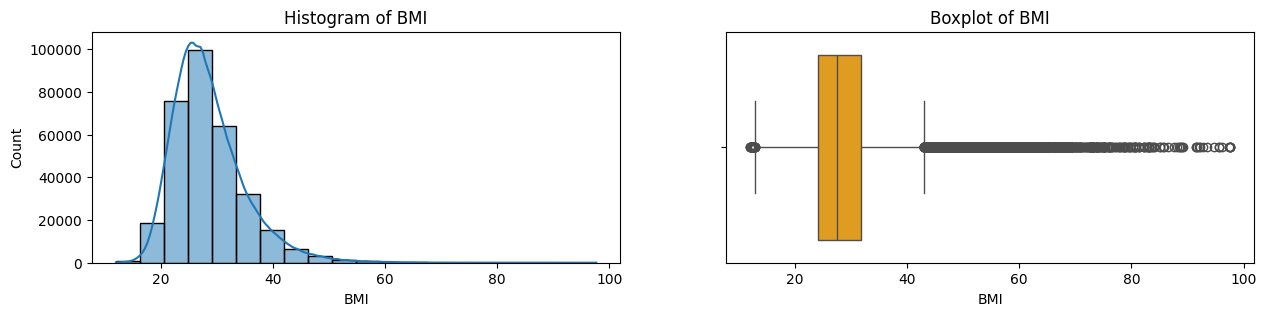

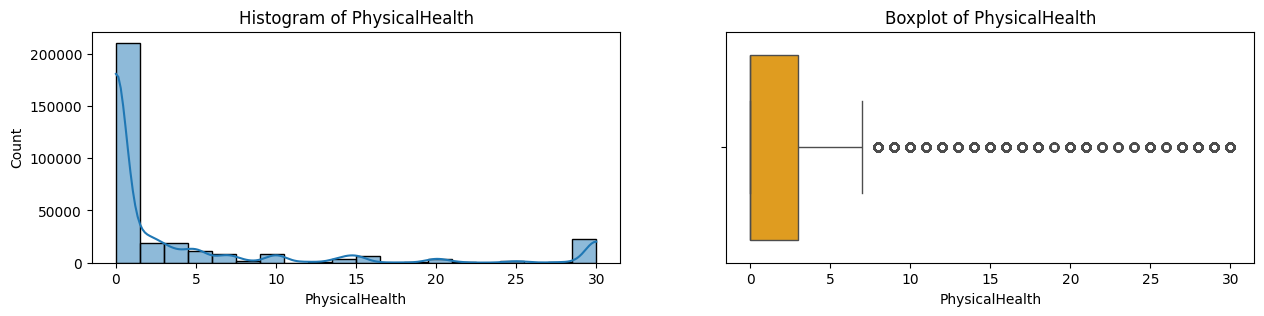

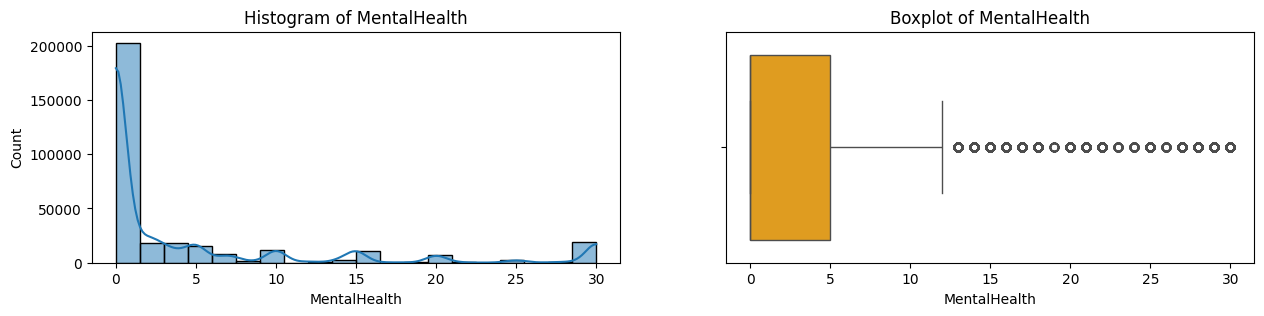

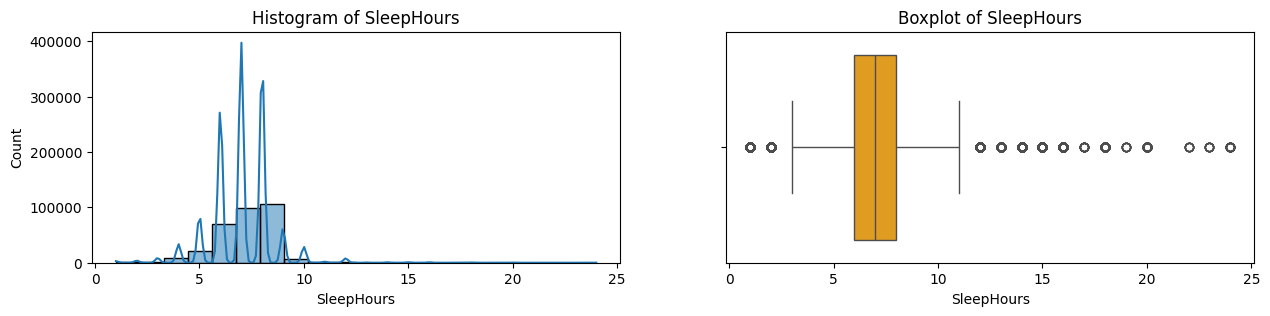

In [ ]:
# Define Analysis function of numerical columns
def analysis_num(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))

    sns.histplot(df1[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df1[col], color="orange", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num(col)

#### How many outliers?

In [ ]:
# Define a function to count number of outlier data
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    return ((data < lower_bound) | (data > upper_bound)).sum()

# Call count outlier function for each numerical fearture
for col in num_cols:
    print(f"Number of outliers in {col}: {count_outliers(df1[col])}")

Number of outliers in BMI: 9928
Number of outliers in PhysicalHealth: 50567
Number of outliers in MentalHealth: 43123
Number of outliers in SleepHours: 4534


### 3.1.2. Categorical Features

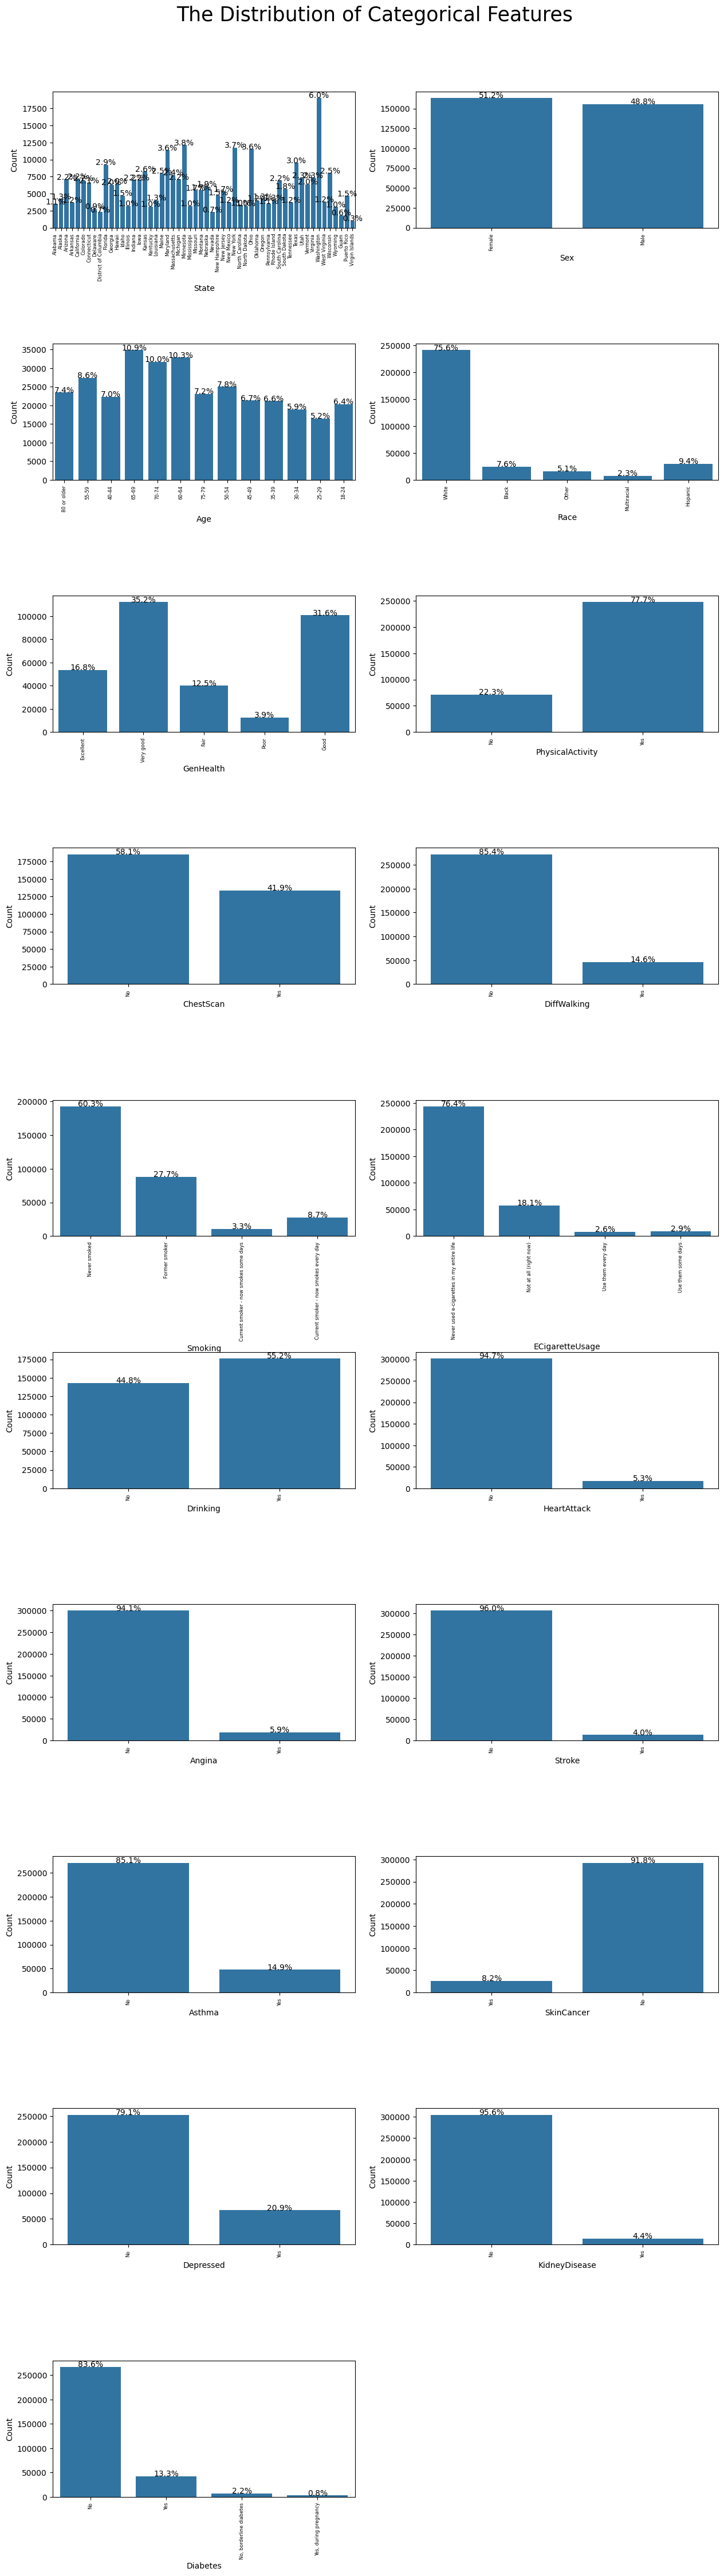

In [ ]:
# Determin the number of rows and columns
L = len(cat_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(cat_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")
# Hide the last subplot if the number of columns is odd
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Categorical Features', fontsize=25)
plt.show()

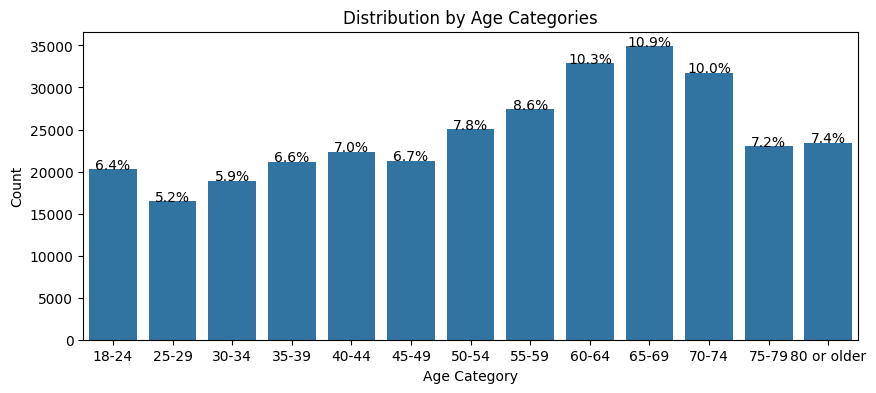

In [ ]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df1,
    x="Age",
    order = sorted(df1["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "Distribution by Age Categories"
)

# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Overall Distribution of Heart Attack

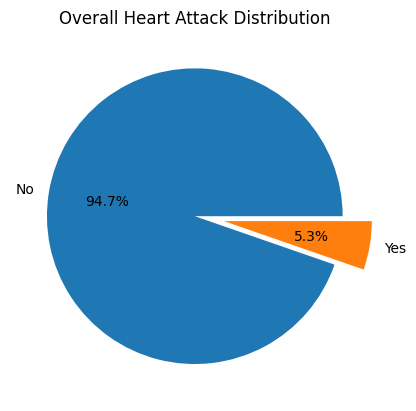

In [ ]:
# Heart Attack distribution
heart_attack_rate = df1["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values,
    labels = heart_attack_rate.index,
    autopct = "%.1f%%",
    explode = [0, 0.2]
    )
plt.title("Overall Heart Attack Distribution")
plt.show()

## 3.2. Two-Variables Analysis

### 3.2.1 Analysis by Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


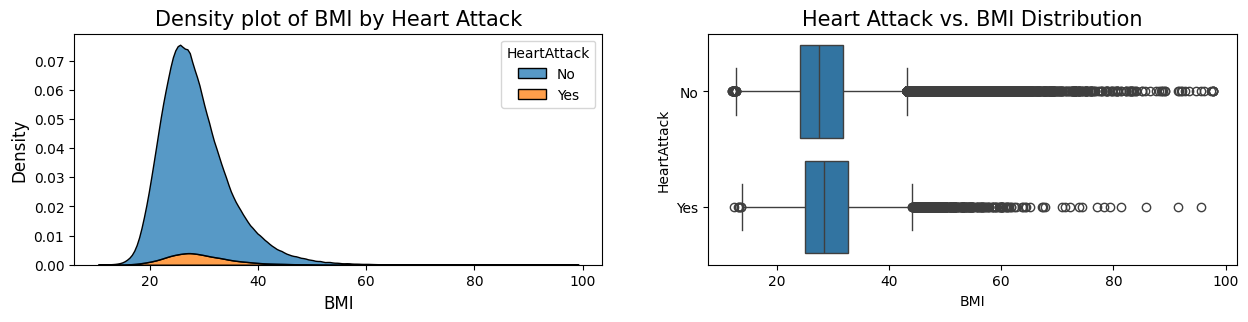

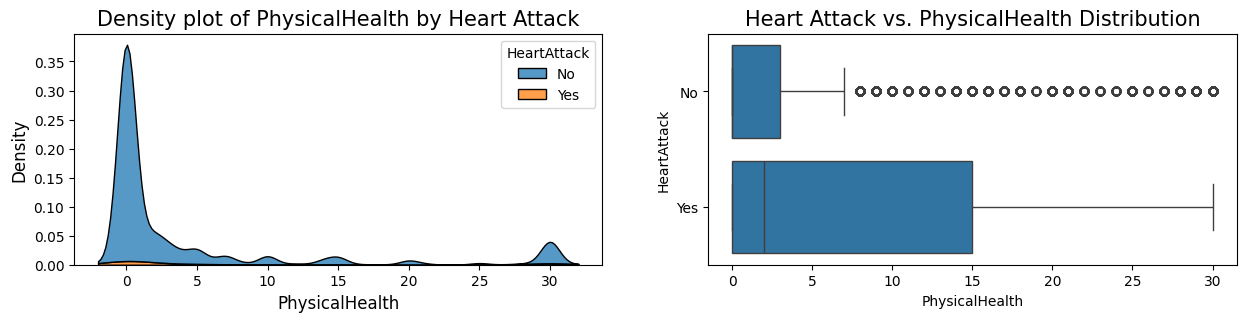

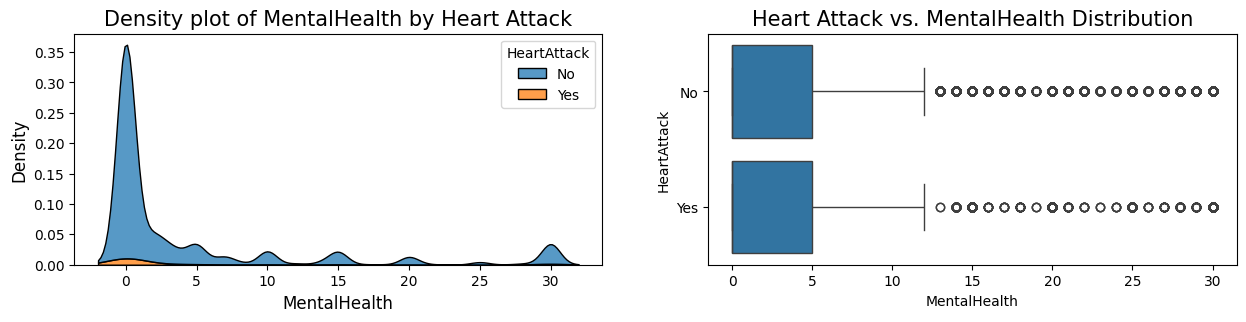

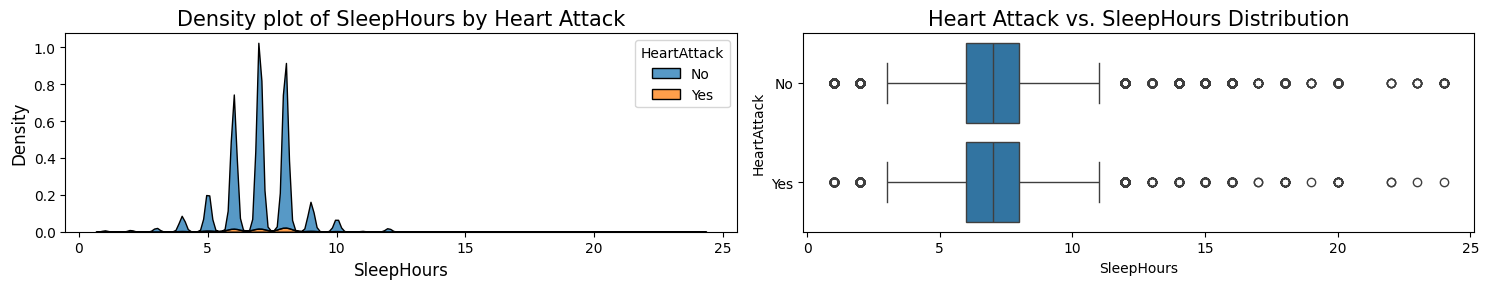

In [ ]:
# Define Analysis function of numerical columns
def analysis_num_2(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))

    # KDE Plot
    sns.kdeplot(data=df1, x=col, hue="HeartAttack", multiple="stack", ax=ax[0])
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    ax[0].set_title(f"Density plot of {col} by Heart Attack", fontsize=15)

    # Boxplot
    sns.boxplot(data=df1, x=col, y="HeartAttack", ax=ax[1])
    ax[1].set_title(f"Heart Attack vs. {col} Distribution", fontsize=15)

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num_2(col)

plt.tight_layout()
plt.show()

### 3.2.2 Analysis by Categorical Features

### Heart Attack Among Genders

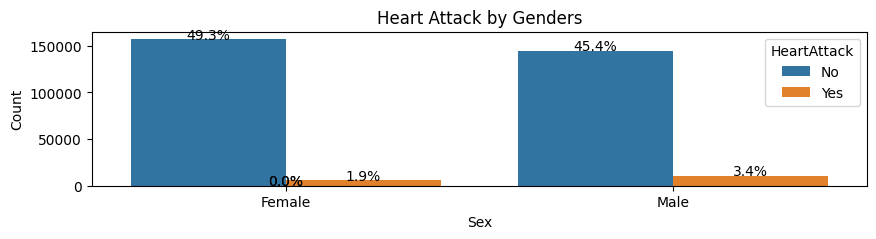

In [ ]:
# Set figure styles
plt.figure(figsize=(10,2))

#Plot countplot
ax = sns.countplot(data=df1, x="Sex", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Genders"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by States

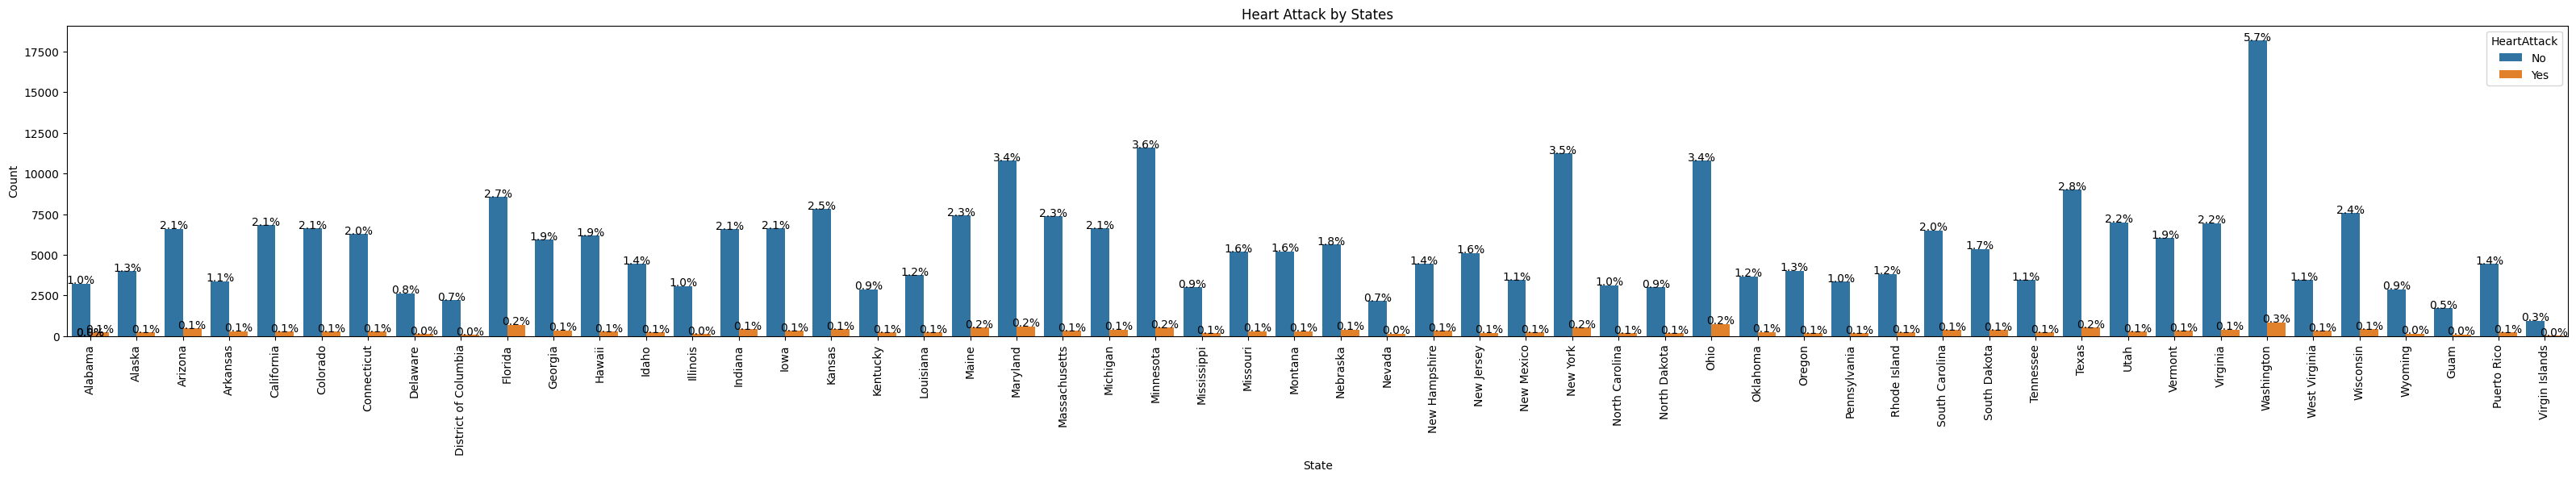

In [ ]:
# Set figure styles
plt.figure(figsize=(40,5))

#Plot countplot
ax = sns.countplot(data=df1, x="State", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by States"
)
ax.tick_params(axis='x', rotation=90, labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Age Groups

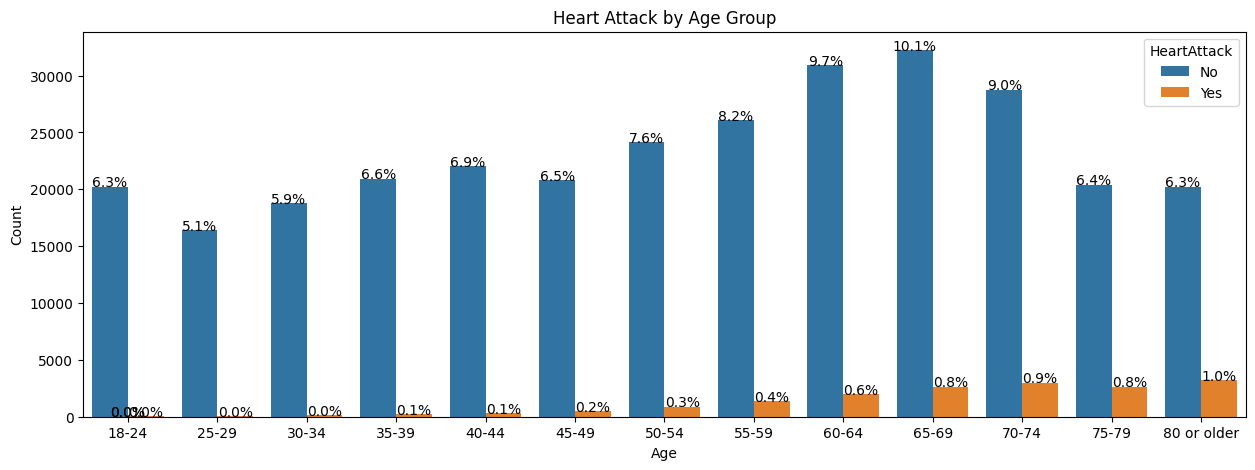

In [ ]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Age", hue="HeartAttack", order = sorted(df1["Age"].unique()))

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Age Group"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Race

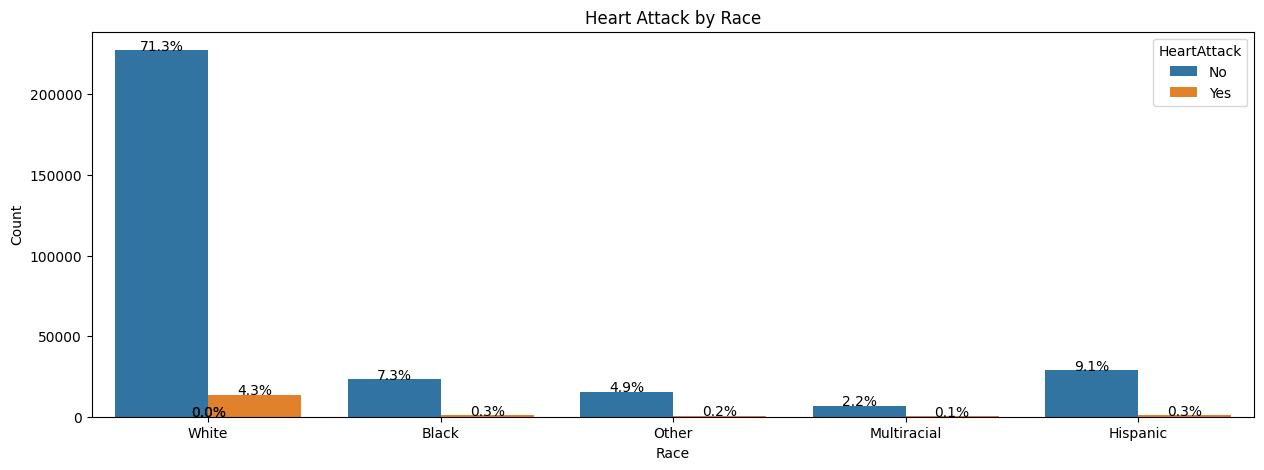

In [ ]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Race", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Race"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Other Categorical Features

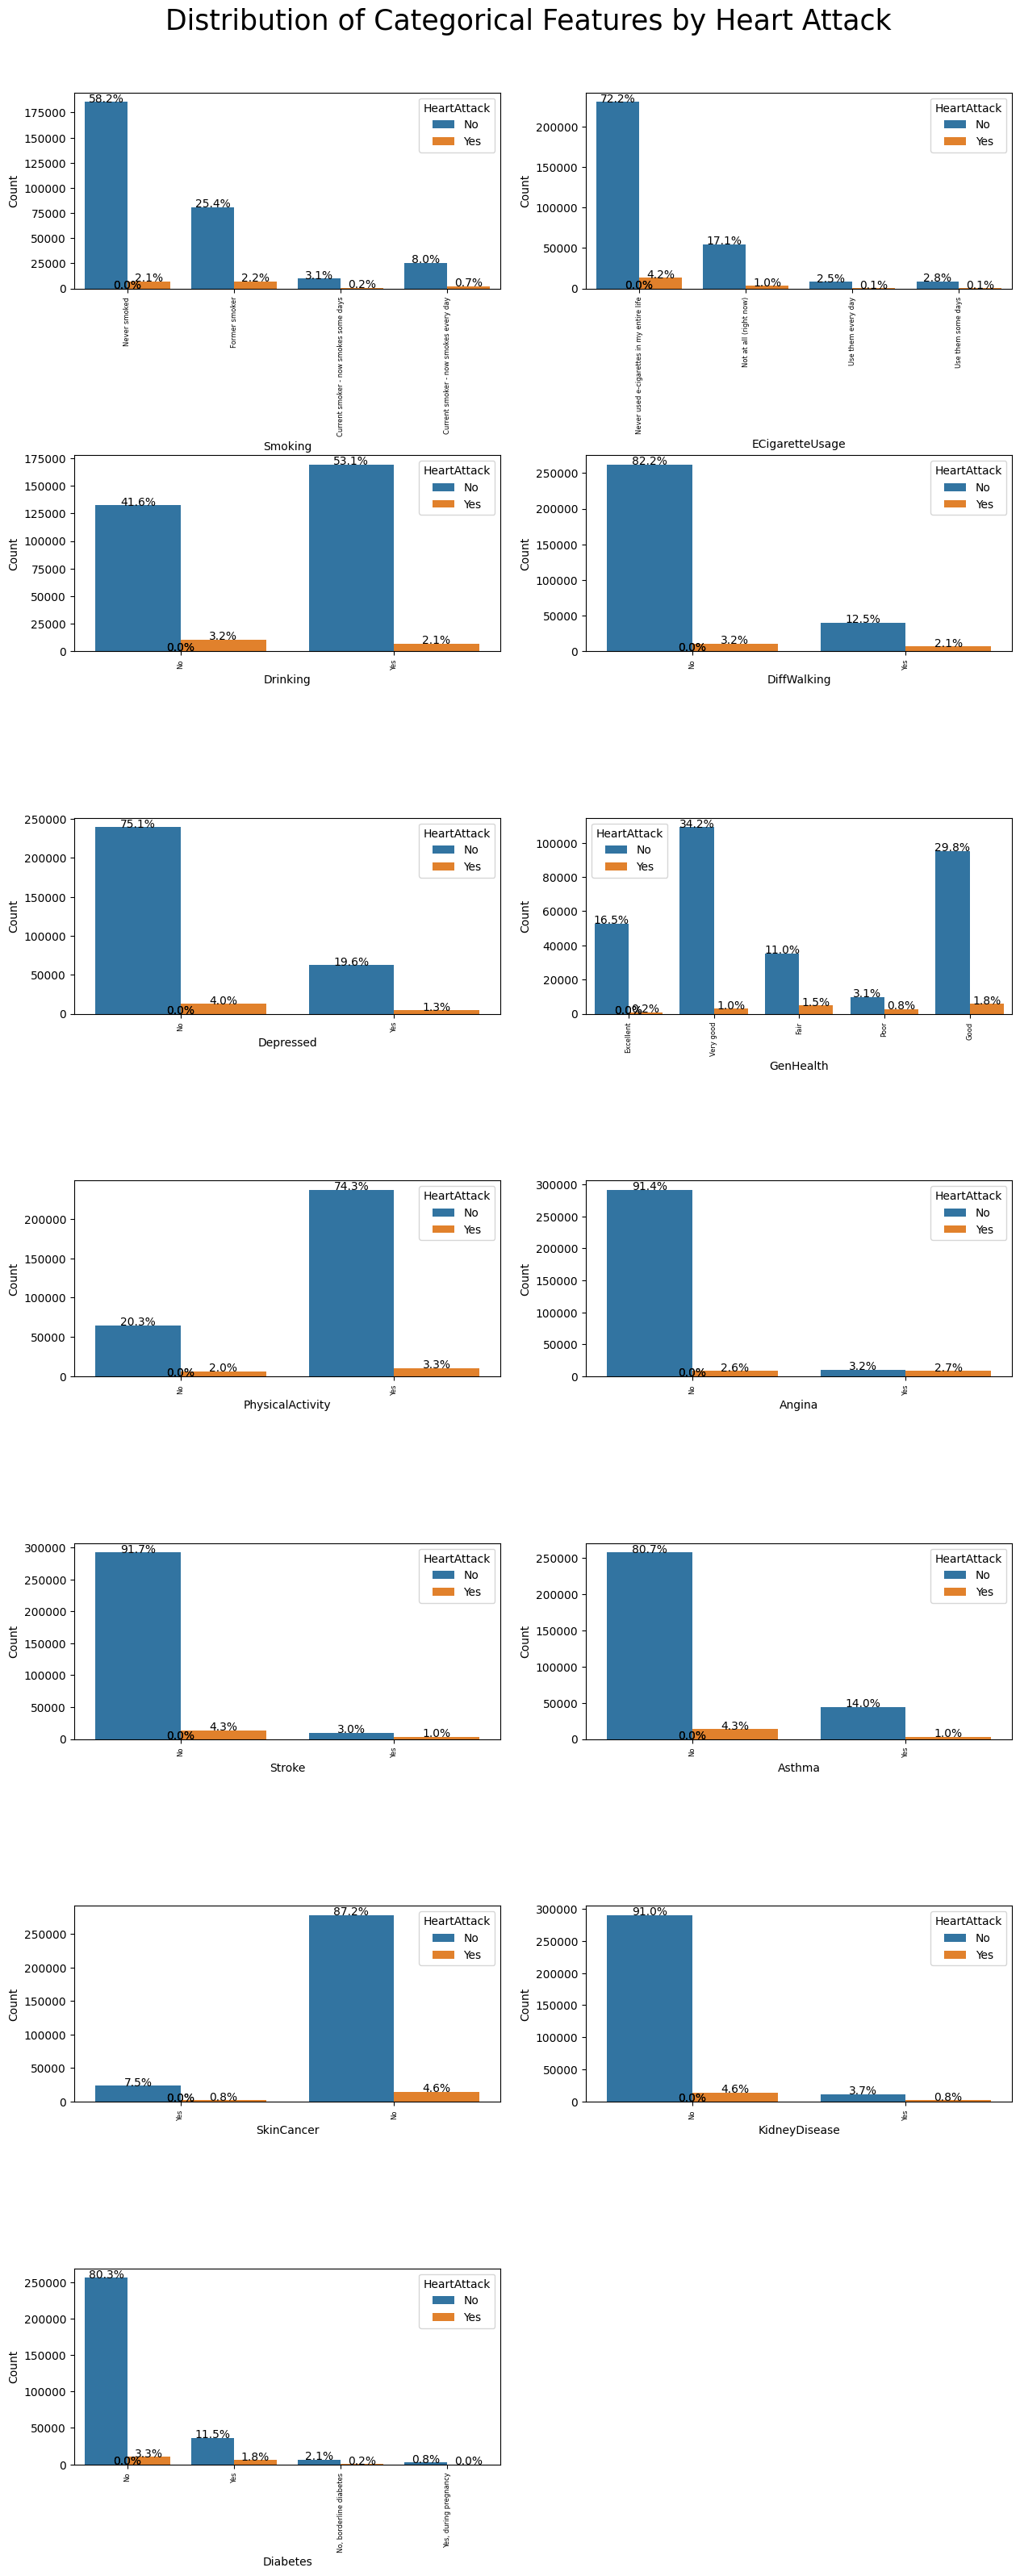

In [ ]:
risk_cols = ['Smoking', 'ECigaretteUsage', 'Drinking', 'DiffWalking', 'Depressed',
             'GenHealth', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma',
             'SkinCancer', 'KidneyDisease', 'Diabetes']
# Determin the number of rows and columns
L = len(risk_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(risk_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, hue="HeartAttack", ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Hide the last subplot if the number of columns is odd
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Attack', fontsize=25)
plt.show()

# 4. Data Processing

### 4.1. Convert Categorical Variables to Numerical Variables

In [ ]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique()
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease']

In [ ]:
# Copy df1 to df2
df2 = df1.copy()

# Then, drop column named "State"
df2 = df2.drop("State", axis=1)

In [ ]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df2[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df2[col] = df2[col].map(mapping)

    # Verify conversion
    if set(df2[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df2[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  object 
 2   Race              318925 non-null  object 
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  object 
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  object 
 12  ECigaretteUsage   318925 non-null  object 
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

In [ ]:
# Encoding "object" type variables

# Age
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df2["Age"] = df2["Age"].replace(age_mapping).astype(int)

# Race
race_mapping = {
    'White': 0,
    'Black': 1,
    'Other': 2,
    'Multiracial': 3,
    'Hispanic': 4
}
df2["Race"] = df2["Race"].replace(race_mapping).astype(int)

# GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df2["GenHealth"] = df2["GenHealth"].replace(genhealth_mapping).astype(int)

# Smoking
smoking_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df2["Smoking"] = df2["Smoking"].replace(smoking_mapping).astype(int)

# ECigaretteUsage
ec_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them every day': 2,
    'Use them some days': 3
}
df2["ECigaretteUsage"] = df2["ECigaretteUsage"].replace(ec_mapping).astype(int)

# Diabetic
diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 3,
    'Yes, during pregnancy': 4
}
df2["Diabetes"] = df2["Diabetes"].replace(diabetic_mapping).astype(int)

In [ ]:
# Check columns' type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  int64  
 2   Race              318925 non-null  int64  
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  int64  
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  int64  
 12  ECigaretteUsage   318925 non-null  int64  
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

### 4.2. Correlation Matrix

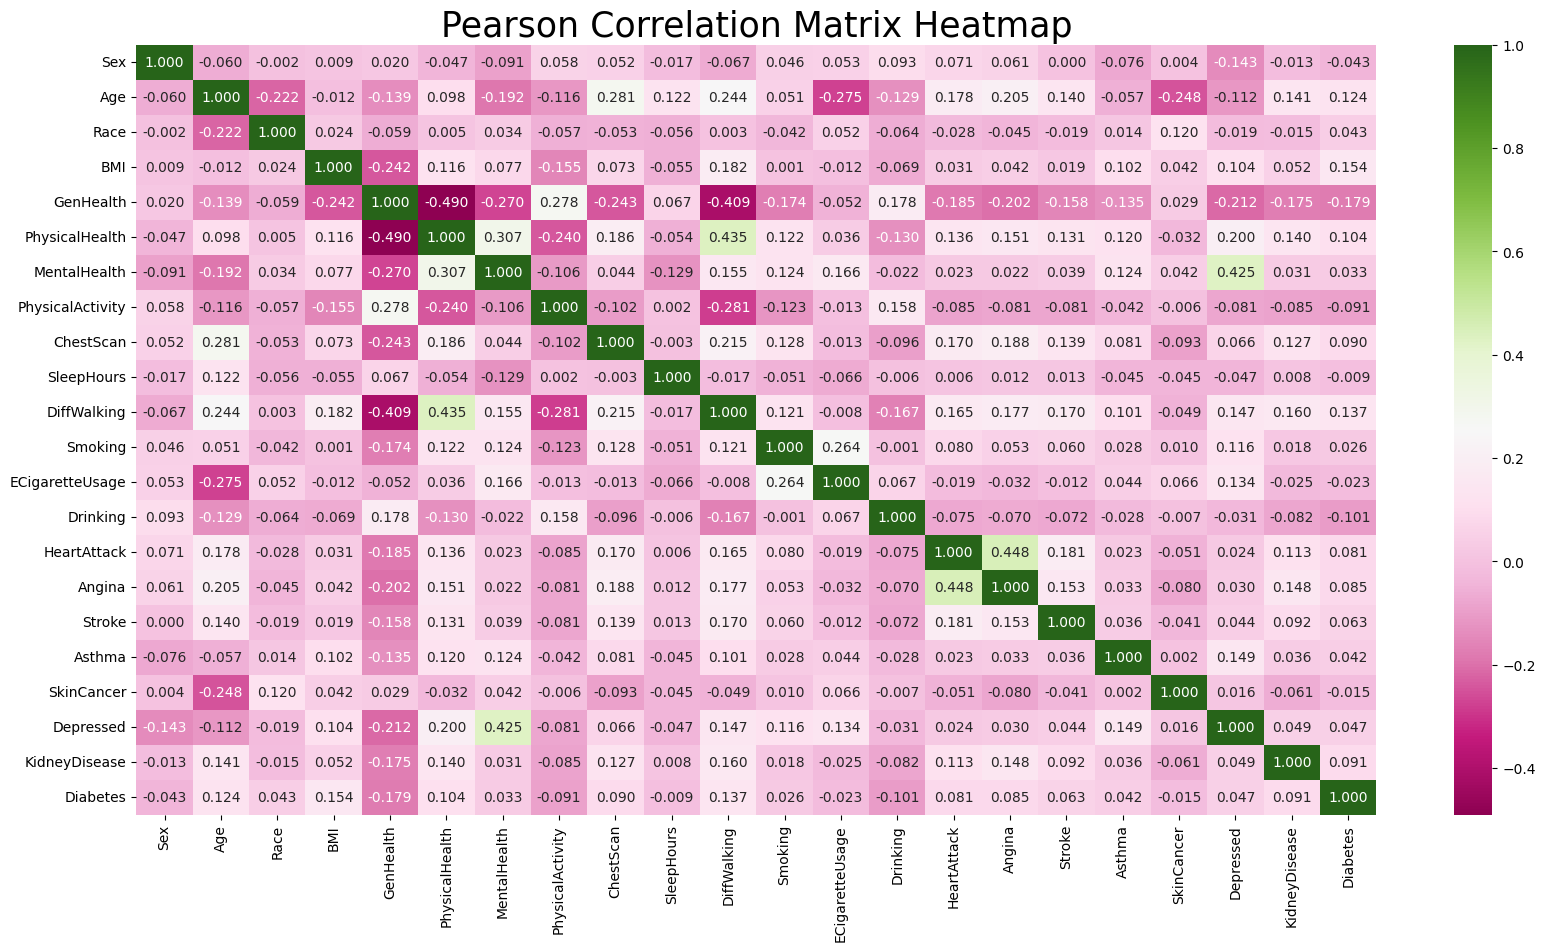

In [ ]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [ ]:
# Copy dataset for Machine Learning
df3 = df2.copy()

In [ ]:
# Split the data into feature (X) and target variable (y)
X = df3.drop("HeartAttack", axis=1)
y = df3["HeartAttack"]

In [ ]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

,y_test,prediction
192368,0,0
31357,0,0
343972,0,0
285408,0,0
270041,0,0
145443,0,0
301779,0,0
61599,0,0
86708,0,0
294870,0,0


##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[74631   864]
 [ 3143  1094]]


In [ ]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.96      0.99      0.97     75495
     Yes (1)       0.56      0.26      0.35      4237

    accuracy                           0.95     79732
   macro avg       0.76      0.62      0.66     79732
weighted avg       0.94      0.95      0.94     79732



**Question:** How well does the logistic regression model predict both the `0` (No Heart Attack) and `1` (Had Heart Attack) labels?

**Answer:** When compared to the original dataset, there are more 'No' than 'Yes'. Even though, the model demonstrates a high accuracy of 95%. The precision score for 'No' is 96%, while the precision for 'Yes' is extremely low with 56%. Additionally, the recall score is 99% for predicting 'No' labels, but 26% for high-risk 'Yes'.

### 5.2. Deep Learning - Standard Scaler Module

In [ ]:
# Copy dataset for Machine Learning
df4 = df2.copy()

In [ ]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df4.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 3748
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            23
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [ ]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df4["BMI"].value_counts()
bmi_counts

BMI
26.63    3438
27.46    2642
24.41    2601
27.44    2494
27.12    2468
         ... 
60.15       1
59.13       1
20.17       1
47.28       1
28.39       1
Name: count, Length: 3748, dtype: int64

In [ ]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 50].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df4['BMI'] = df4['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df4['BMI'].value_counts()

BMI
Other    26876
26.63     3438
27.46     2642
24.41     2601
27.44     2494
         ...  
18.48       50
20.77       50
20.64       50
20.82       50
31.42       50
Name: count, Length: 965, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df4 = pd.get_dummies(df4)
num_df4.head()

,Sex,Age,Race,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,DiffWalking,...,BMI_48.06,BMI_48.42,BMI_48.81,BMI_48.82,BMI_49.6,BMI_49.78,BMI_49.92,BMI_51.49,BMI_53.14,BMI_Other
1,0,12,0,4,0.0,0.0,0,0,6.0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,7,0,3,2.0,3.0,1,0,5.0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,4,0,1,2.0,0.0,1,1,9.0,0,...,False,False,False,False,False,False,False,False,False,False
5,1,12,0,0,1.0,0.0,0,0,7.0,0,...,False,False,False,False,False,False,False,False,False,False
6,0,12,1,3,0.0,0.0,1,0,7.0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for col in num_df4.columns:
  print(col)

Sex
Age
Race
GenHealth
PhysicalHealth
MentalHealth
PhysicalActivity
ChestScan
SleepHours
DiffWalking
Smoking
ECigaretteUsage
Drinking
HeartAttack
Angina
Stroke
Asthma
SkinCancer
Depressed
KidneyDisease
Diabetes
BMI_16.46
BMI_16.64
BMI_16.95
BMI_17.16
BMI_17.22
BMI_17.23
BMI_17.43
BMI_17.47
BMI_17.63
BMI_17.71
BMI_17.72
BMI_17.75
BMI_17.85
BMI_17.94
BMI_17.97
BMI_18.01
BMI_18.02
BMI_18.13
BMI_18.25
BMI_18.29
BMI_18.3
BMI_18.31
BMI_18.37
BMI_18.46
BMI_18.47
BMI_18.48
BMI_18.54
BMI_18.55
BMI_18.56
BMI_18.6
BMI_18.64
BMI_18.65
BMI_18.75
BMI_18.79
BMI_18.83
BMI_18.88
BMI_18.89
BMI_18.95
BMI_18.97
BMI_18.99
BMI_19.01
BMI_19.05
BMI_19.13
BMI_19.14
BMI_19.2
BMI_19.22
BMI_19.26
BMI_19.37
BMI_19.39
BMI_19.46
BMI_19.49
BMI_19.53
BMI_19.57
BMI_19.58
BMI_19.64
BMI_19.67
BMI_19.69
BMI_19.74
BMI_19.75
BMI_19.77
BMI_19.79
BMI_19.8
BMI_19.84
BMI_19.85
BMI_19.9
BMI_19.91
BMI_19.92
BMI_19.94
BMI_19.97
BMI_20.0
BMI_20.02
BMI_20.05
BMI_20.07
BMI_20.08
BMI_20.09
BMI_20.12
BMI_20.18
BMI_20.19
BMI_20.2
BMI_20

In [ ]:
X = num_df4.drop("HeartAttack", axis=1)
y = num_df4["HeartAttack"]

In [ ]:
# # Split our preprocessed data into our features and target arrays
# y = num_df4["HeartAttack"].values
# X = num_df4.drop(columns="HeartAttack").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [ ]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [ ]:
import tensorflow as tf

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                78880     
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 1)                 81        
                                                                 
Total params: 91921 (359.07 KB)
Trainable params: 91921 (359.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7475/7475 [==============================] - 33s 4ms/step - loss: 0.1531 - accuracy: 0.9470
Epoch 2/100
7475/7475 [==============================] - 34s 5ms/step - loss: 0.1452 - accuracy: 0.9479
Epoch 3/100
7475/7475 [==============================] - 33s 4ms/step - loss: 0.1434 - accuracy: 0.9484
Epoch 4/100
7475/7475 [==============================] - 35s 5ms/step - loss: 0.1425 - accuracy: 0.9494
Epoch 5/100
7475/7475 [==============================] - 33s 4ms/step - loss: 0.1427 - accuracy: 0.9491
Epoch 6/100
7475/7475 [==============================] - 43s 6ms/step - loss: 0.1436 - accuracy: 0.9483
Epoch 7/100
4425/7475 [================>.............] - ETA: 13s - loss: 0.1445 - accuracy: 0.9488

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# 6. PCA components for clusters

6.1

In [ ]:
df4.shape

6.2: Scale the Dataframe

In [ ]:
# Identify columns with non-numeric values
non_numeric_columns = df4.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example using one-hot encoding)
df4_encoded = pd.get_dummies(df4, columns=non_numeric_columns)

# Scale the numerical data
heart_data_scaled = scaler.fit_transform(df4_encoded)

In [ ]:
# Convert scaled data into a dataframe
df_heart_scaled = pd.DataFrame(heart_data_scaled, columns=df4_encoded.columns)
df_heart_scaled.head()

In [ ]:
# Encode the "HeartAttack" column to variables to categorize Yes versus No.
heart_dummies = pd.get_dummies(df4["HeartAttack"])
heart_dummies.head()

In [ ]:
# Concatenate the "HeartAttack" variables with the scaled data DataFrame.
df_heart_scaled = pd.concat([df_heart_scaled, heart_dummies], axis=1)
# Display the sample data
df_heart_scaled.head()

6.3: Initialize the K-means model

In [ ]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

In [ ]:
# Impute missing values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
df_heart_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_heart_scaled))
df_heart_scaled_imputed.columns = df_heart_scaled.columns

# Fit the model with the imputed data
model.fit(df_heart_scaled_imputed)

6.4: Predict the clusters then create new DataFrame with predicted clusters

In [ ]:
# Predict the model segments (clusters)
heart_clusters = model.predict(df_heart_scaled_imputed)

# View the heart segments
print(heart_clusters)

In [ ]:
# Create a new column in the DataFrame with the predicted clusters
df_heart_scaled["HeartCluster"] = heart_clusters

# Review the DataFrame
df_heart_scaled.head()

6.5: Create a scatter plot to visualize "HeartCluster"

In [ ]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
import hvplot.pandas
df_heart_scaled.hvplot.scatter(
    x="Angina",
    y="HeartAttack",
    by="HeartCluster",
    # hover_cols = [""],
    title = "Scatter Plot by Heart Segment - k=3"
)